<a href="https://colab.research.google.com/github/abhilashra0/ONLINE-SHOPPING-CART/blob/main/loanknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score


In [6]:
csv_file = pd.read_csv("/content/finaldatatrain.csv")

#make copy to avoid changing original data

new_csv_file = csv_file.copy()

new_csv_file.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loa0_Status
0,9001002,1,0,0,1,0,5849,0.0,0,360,1,1,1
1,9001003,1,1,1,1,0,4583,1508.0,128,360,1,0,0
2,9001005,1,1,0,1,1,3000,0.0,66,360,1,1,1
3,9001006,1,1,0,0,0,2583,2358.0,120,360,1,1,1
4,9001008,1,0,0,1,0,6000,0.0,141,360,1,1,1
5,9001011,1,1,2,1,1,5417,4196.0,267,360,1,1,1
6,9001013,1,1,0,0,0,2333,1516.0,95,360,1,1,1
7,9001014,1,1,3,1,0,3036,2504.0,158,360,0,0,0
8,9001018,1,1,2,1,0,4006,1526.0,168,360,1,1,1
9,9001020,1,1,1,1,0,12841,10968.0,349,360,1,0,0


In [7]:
new_csv_file.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loa0_Status          0
dtype: int64

In [8]:
mymap = {'3+':4, 'Male':0, 'Female':1, 'Yes':1, 'No':0, 'Graduate':1, 'Not Graduate':0, 
'Rural':0, 'Urban':2, 'Semiurban':1, 'Y':1, 'N':0}
new_csv_file = new_csv_file.applymap(lambda s: mymap.get(s) if s in mymap else s)
clean_data = new_csv_file.fillna(new_csv_file.mean())
clean_data.apply(lambda x: sum(x.isnull()),axis=0)
clean_data = clean_data.dropna()
clean_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loa0_Status          0
dtype: int64

In [9]:
x = clean_data.drop(['Loa0_Status','Loan_ID'], axis = 1).values
y = clean_data['Loa0_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.1, random_state=42, 
stratify = y)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
prediction = knn.predict(X_test)
print("Prediction for test set: {}".format(prediction))
print('Score for the training set', knn.score(X_train, Y_train))
print('score for the test set',knn.score(X_test, Y_test))
print('Accuracy of the model', accuracy_score(Y_test, prediction))
# Loan Result for a person earning 5000 and loan amount of 50000:
new_data = np.array([[0.0, 0.0, 0.0, 1.0, 0.0, 5000, 0.0, 50000, 240, 0.0, 2]]) 
knn.predict(new_data)

Prediction for test set: [0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 0 1 0 1]
Score for the training set 0.9692307692307692
score for the test set 0.6585365853658537
Accuracy of the model 0.6585365853658537


array([0])

In [11]:
from sklearn import metrics

In [12]:
confusion_matrix=metrics.confusion_matrix( Y_test,prediction)

In [13]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])

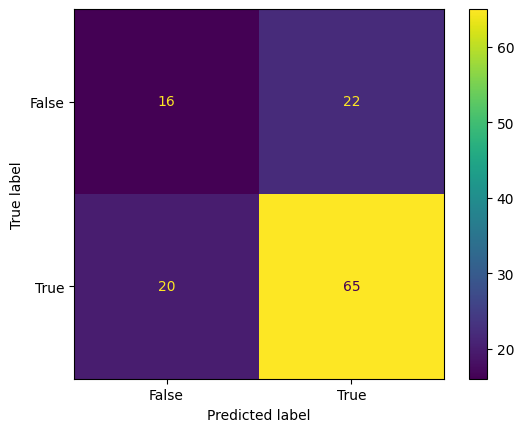

In [14]:
cm_display.plot()
plt.show()